# importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

# importing Data

In [3]:
df = pd.read_csv('C:/Users/irvan/Downloads/loan_data_2007_2014.csv', index_col=0)
df.sample(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
135274,5194643,6516806,24000,24000,23950.0,60 months,8.90,497.04,A,A5,"Crayola, LLC",6 years,MORTGAGE,100000.0,Verified,Jun-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/20/13 > I am paying off...,debt_consolidation,Home Repairs and Credit card Payoff,180xx,PA,9.33,0.0,May-90,0.0,NaN,NaN,12.0,0.0,30825,46.4,26.0,f,13334.08,13306.29,14896.72,14865.70,10665.92,4230.80,0.0,0.0,0.0,Jan-16,497.04,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,244207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66400.0,NaN,NaN,NaN
284947,30175851,32719083,27200,27200,27200.0,60 months,14.99,646.95,C,C5,superintendent,10+ years,MORTGAGE,85000.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,920xx,CA,20.09,0.0,Jan-97,0.0,NaN,NaN,12.0,0.0,35752,60.6,32.0,w,22532.28,22532.28,9034.65,9034.65,4667.72,4366.93,0.0,0.0,0.0,Dec-15,646.95,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,397432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59000.0,NaN,NaN,NaN


# Exploring Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
df['id'].nunique(), df['member_id'].nunique()

(466285, 466285)

Terlihat bahwa tidak ada id atau member_id yang duplikat, artinya setiap baris sudah mewakili satu individu.

In [6]:
'''
ini adalah code untuk mengecek jumlah missig values yang ada pada dataset yang sedang diolah.
jika ada lebih dari 60% missing, maka akan di drop.
'''
print(df.shape)

datamissing = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).reset_index()
# datamissing = pd.DataFrame(df.isnull().sum()).reset_index()
datamissing['nama kolom'] = datamissing['index']
datamissing['jumlah missing values'] = datamissing[0]
datamissing['persentase'] = round(datamissing['jumlah missing values']/df.shape[0]*100,)
datamissing.drop(['index',0], axis=1, inplace=True )
# pd.set_option('display.max_rows', None) # max row
datamissing

(466285, 74)


,nama kolom,jumlah missing values,persentase
0,inq_last_12m,466285,100.0
1,verification_status_joint,466285,100.0
2,open_acc_6m,466285,100.0
3,open_il_6m,466285,100.0
4,open_il_12m,466285,100.0
5,open_il_24m,466285,100.0
6,mths_since_rcnt_il,466285,100.0
7,dti_joint,466285,100.0
8,total_bal_il,466285,100.0
9,annual_inc_joint,466285,100.0


In [7]:
#kolom yang memiliki missing values lebih dari 60% akan di drop
#sehingga akan dimasukkan ke list
datamissing = datamissing[datamissing['persentase']>60]

#list drop ==> missing values > 60%
columnsToDrop = datamissing['nama kolom'].tolist()
columnsToDrop2 = [

#unique id
'id'
 ,'member_id'
#free text
 ,'url'
#lexpert judgment
 ,'sub_grade'                
#constant/orhers
 ,'zip_code']

columnsToDrop = columnsToDrop + columnsToDrop2

In [8]:
df.drop(columnsToDrop, axis=1, inplace=True)

In [9]:
df.shape

(466285, 49)

kolom berhasil dibuang sehingga menjadi 49 kolom

# Definition of Label
loan status cocok untuk dijadikan label untuk machine learning. mari kita cek nilai dari loan_status.

In [10]:
df['loan_status'].value_counts()/len(df)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

terlihat ada banyak kategori pada kolom loan_status

1. Current artinya pembayaran lancar; 
2. Charged Off artinya pembayaran macet sehingga dihapusbukukan; 
3. Late artinya pembayaran telat dilakukan; 
4. In Grace Period artinya dalam masa tenggang; 
5. Fully Paid artinya pembayaran lunas; Default artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan peminjam yang buruk atau peminjam yang baik. maka dari itu akan saya definisikan sebagai bad load dan good loan.

karena saya tidak tau yang dimaksud bad load pada instansi yang memiliki data, maka dari itu saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [11]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['target'] = np.where(df['loan_status'].isin(bad_status), 1, 0) # merubah semua nilai yg ada di list bad_status ke 1 ==> badloan,0 ==> goodloan
df.drop('loan_status', axis=1, inplace=True) # drop fitur asli ==> loan_status
df['target'].value_counts()/len(df)*100 # cek balance dari target

'''
1 = adalah bad loan, peminjam dengan prilaku buruk
0 = peminjam good loan, peminjam dengan prilaku baik
'''

'\n1 = adalah bad loan, peminjam dengan prilaku buruk\n0 = peminjam good loan, peminjam dengan prilaku baik\n'

# EDA part 1

## Numerical Data

In [12]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=numerics).shape[1],'kolom numerik')
# print('kolom numerik pada data ==> ', list(df.select_dtypes(include=numerics).columns),' \n')
df_num = df.select_dtypes(include=numerics)
df_num.head(3)


Kita dapat mengamati bahwa data memiliki 466285 baris dan memiliki 32 kolom numerik


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN,0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN,1
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,1,0.0,NaN,NaN,NaN,0


In [13]:
df.select_dtypes(exclude='object').nunique()

loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
mths_since_last_delinq           145
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt_amnt               198194
collections_12_mths_ex_med         9
policy_code                        1
a

policy_code walaupun data numerical hanya memiliki 1 unik value, maka dari itu juga akan di drop.

In [14]:
df.drop('policy_code', axis=1, inplace=True)

## Non Numerical Data

In [15]:
df_cat = df.select_dtypes(include=object)
rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  df[col].unique()
        }
  )
pd.options.display.max_colwidth = 170 #maksimal tampil 170 karakter
# pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Kategori : \n') 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Informasi Kolom Kategori : 



C:\Users\irvan\AppData\Local\Temp/ipykernel_9248/2632093139.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,emp_title,205476,object,"[nan, Ryder, AIR RESOURCES BOARD, University Medical Group, Veolia Transportaton, Southern Star Photography, MKC Accounting , Starbucks, Southwest Rural metro, UCLA, ..."
1,title,63100,object,"[Computer, bike, real estate business, personel, Personal, My wedding loan I promise to pay back, Loan, Car Downpayment, Expand Business & Buy Debt Portfolio, Buildin..."
2,earliest_cr_line,665,object,"[Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-04, Jul-05, Jan-07, Apr-04, Sep-04, Jan-98, Oct-89, Jul-03, May-91, Sep-07, Oct-98, Aug-93, Oct-03, Jan-01, Nov-97, Feb-8..."
3,last_credit_pull_d,104,object,"[Jan-16, Sep-13, Jan-15, Sep-15, Dec-14, Aug-12, Mar-13, Dec-15, Aug-13, Nov-12, Mar-14, Apr-15, May-14, Jul-15, Jul-12, Sep-12, May-13, Oct-15, Jun-12, Mar-15, Dec-1..."
4,next_pymnt_d,101,object,"[nan, Feb-16, Jan-16, Sep-13, Feb-14, May-14, Jun-13, Mar-12, Apr-12, May-13, Aug-12, Aug-13, Jun-12, Nov-13, Feb-12, Oct-11, Jan-13, Jan-14, Jul-13, Jul-15, Jan-12, ..."
5,last_pymnt_d,99,object,"[Jan-15, Apr-13, Jun-14, Jan-16, Apr-12, Nov-12, Jun-13, Sep-13, Jul-12, Oct-13, May-13, Feb-15, Aug-15, Oct-12, Sep-12, nan, Dec-12, Dec-14, Aug-13, Nov-13, Jan-14, ..."
6,issue_d,91,object,"[Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-11, Jun-11, May-11, Apr-11, Mar-11, Feb-11, Jan-11, Dec-10, Nov-10, Oct-10, Sep-10, Aug-10, Jul-10, Jun-10, May-10, Apr-1..."
7,addr_state,50,object,"[AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, FL, NY, PA, MN, NJ, KY, OH, SC, RI, LA, MA, WA, WI, AL, CO, KS, NV, AK, MD, WV, VT, MI, DC, SD, NH, AR, NM, MT, HI, WY, O..."
8,purpose,14,object,"[credit_card, car, small_business, other, wedding, debt_consolidation, home_improvement, major_purchase, medical, moving, vacation, house, renewable_energy, educational]"
9,emp_length,12,object,"[10+ years, < 1 year, 1 year, 3 years, 8 years, 9 years, 4 years, 5 years, 6 years, 2 years, 7 years, nan]"


kolom application_type hanya 1 value unik, maka dari itu akan di drop juga, kemudian emp_title dan title memiliki nilai unik yang sangat tinggi (high cardinality) juga akan di drop

In [16]:
df.drop(['application_type','emp_title','title'], axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING part1

kolom emp_length dan term bercampur dengan angka, maka dari itu string akan dihapus dan akan di convert menjadi numeric

## emp_length

In [17]:
df['emp_length'].unique(), df['term'].unique()

(array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
        '4 years', '5 years', '6 years', '2 years', '7 years', nan],
       dtype=object),
 array([' 36 months', ' 60 months'], dtype=object))

In [18]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

C:\Users\irvan\AppData\Local\Temp/ipykernel_9248/1732335877.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


In [19]:
df['emp_length_int'] = df['emp_length_int'].astype(float)
df.drop('emp_length', axis=1, inplace=True)

In [20]:
df['emp_length_int'].value_counts()

10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length_int, dtype: int64

## term

In [21]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Memodifikasi term. Contoh: 36 months -> 36

In [22]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(float)
df.drop('term', axis=1, inplace=True)

## earliest_cr_line
earliest_cr_line adalah Bulan dimana batas kredit paling awal yang dilaporkan peminjam dibuka</br>
Memodifikasi earliest_cr_line dari bentuk asalnya adalah bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. maka dari itu biasanya akan menggunakan reference date = hari ini. tapi, karena dataset ini adalah dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. maka dari itu, saya akan mencoba menggunakan tanggal 2017-12-01 sebagai reference date.

In [23]:
df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

bentuknya bulan-tahun, kita akan rubah menjadi tahun-bulan-tanggal

In [24]:
'''
funsi days_of_future ada untuk menghindari python salah dalam menconvert tanggal,
contoh : Apr-99 menjadi 2099-04-01
sehingga python dapat menkonversi tgl sesuai dgn tanggal sebenanya,
contoh : Apr-99 menjadi 1999-04-01
'''

def days_of_future_past(date,chk_y=pd.Timestamp.today().year):
    return date.replace(year=date.year-100) if date.year > chk_y else date
 

df['earliest_cr_line_tahunbulanhari'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y').map(days_of_future_past)
df['earliest_cr_line_tahunbulanhari'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_tahunbulanhari, dtype: datetime64[ns]

kemudian akan dikurangin dengan 2017-12-01 untuk mengetahui seberapa lama telah berlalu dari earliest_cr_line/earliest_cr_line_tahunbulanhari

In [25]:
df['bulan_berlalu_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - 
                                                        df['earliest_cr_line_tahunbulanhari']) / 
                                                        np.timedelta64(1, 'M')))
'''
2017-12-01 dikurang dengan 'earliest_cr_line_tahunbulanhari'
kumdian dibagi bulan untuk mengetahui berapa bulan telah
berlalu.
'''
print('hasil perhitungan untuk mengetahui sudah berapa bulan berlalu :')
display(df['bulan_berlalu_since_earliest_cr_line'].head(5))

print('\nDescribe :')
display(df['bulan_berlalu_since_earliest_cr_line'].describe())

hasil perhitungan untuk mengetahui sudah berapa bulan berlalu :


0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: bulan_berlalu_since_earliest_cr_line, dtype: float64


Describe :


count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: bulan_berlalu_since_earliest_cr_line, dtype: float64

In [26]:
'''
kode untuk mengecek apakah ada nilai minus/salah konversi tgl
'''

df[df['bulan_berlalu_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_tahunbulanhari', 'bulan_berlalu_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_tahunbulanhari,bulan_berlalu_since_earliest_cr_line


sepertinya aman, lanjut saja

In [27]:
df.drop(['earliest_cr_line', 'earliest_cr_line_tahunbulanhari'], axis=1, inplace=True)

## issue_d

prosesnya sama dgn earliest_cr_line

In [28]:
df['issue_d_tahunbulanhari'] = pd.to_datetime(df['issue_d'],format='%b-%y').map(days_of_future_past)
df['bulan_berlalu_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_tahunbulanhari']) / np.timedelta64(1, 'M')))
df.drop(['issue_d', 'issue_d_tahunbulanhari'], axis=1, inplace=True)
df['bulan_berlalu_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: bulan_berlalu_since_issue_d, dtype: float64

## last_pymnt_d

prosesnya sama dgn earliest_cr_line

In [29]:
df['last_pymnt_d_tahunbulanhari'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y').map(days_of_future_past)
df['bulan_berlalu_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_tahunbulanhari']) / np.timedelta64(1, 'M')))
df.drop(['last_pymnt_d', 'last_pymnt_d_tahunbulanhari'], axis=1, inplace=True)
df['bulan_berlalu_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: bulan_berlalu_since_issue_d, dtype: float64

## next_pymnt_d

prosesnya sama dgn earliest_cr_line

In [30]:
df['next_pymnt_d_tahunbulanhari'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y').map(days_of_future_past)
df['bulan_berlalu_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_tahunbulanhari']) / np.timedelta64(1, 'M')))
df.drop(['next_pymnt_d', 'next_pymnt_d_tahunbulanhari'], axis=1, inplace=True)
df['bulan_berlalu_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: bulan_berlalu_since_next_pymnt_d, dtype: float64

## last_credit_pull_d

prosesnya sama dgn earliest_cr_line

In [31]:
df['last_credit_pull_d_tahunbulanhari'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y').map(days_of_future_past)
df['bulan_berlalu_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_tahunbulanhari']) / np.timedelta64(1, 'M')))
df.drop(['last_credit_pull_d', 'last_credit_pull_d_tahunbulanhari'], axis=1, inplace=True)
df['bulan_berlalu_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: bulan_berlalu_since_last_credit_pull_d, dtype: float64

# EDA part 2

## Correlation check

<AxesSubplot:>

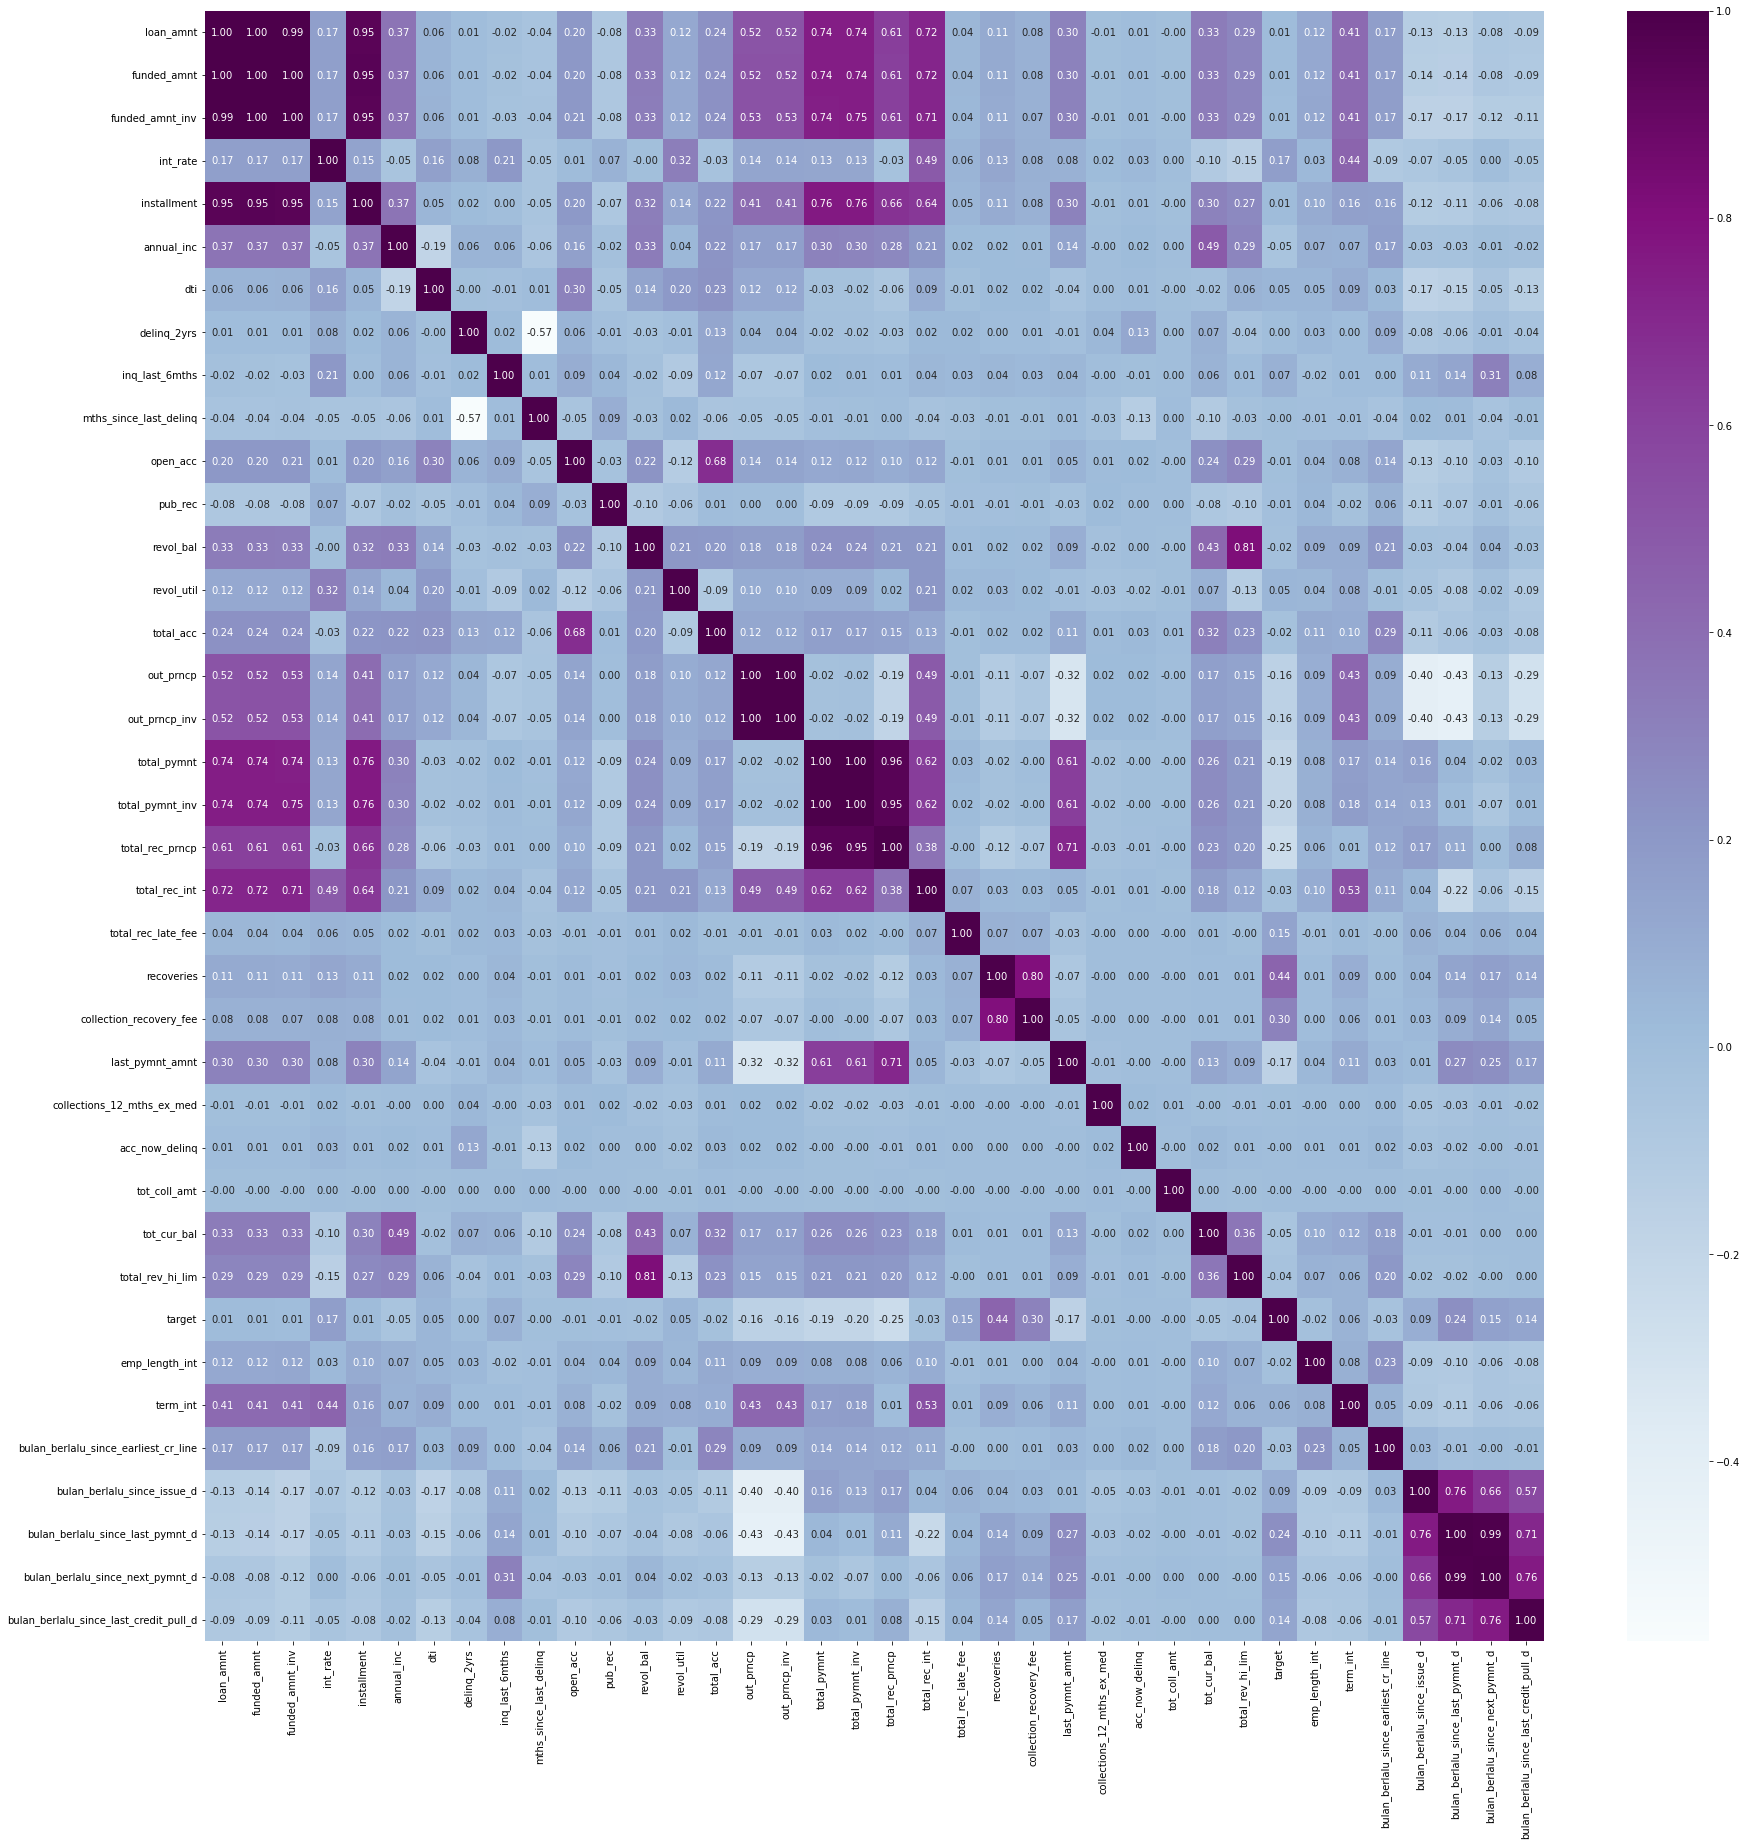

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, fmt = ".2f", cmap = "BuPu")

jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, biasanya pada angka 0.7 namun angka ini tergantung data scientist itu sendiri

In [33]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

C:\Users\irvan\AppData\Local\Temp/ipykernel_9248/2387715113.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'bulan_berlalu_since_last_pymnt_d',
 'bulan_berlalu_since_next_pymnt_d',
 'bulan_berlalu_since_last_credit_pull_d']

In [34]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

## Pairplot

In [35]:
# plt.figure(figsize=(160,100))
# sns.pairplot(df,
#             #  hue='Turbo',
#              corner=True)



pariplot tidak cocok dengan data dengan fitur banyak

# CLEANING, PREPROCESSING, FEATURE ENGINEERING part2

## Missing Values

In [36]:
'''
ini adalah code untuk mengecek jumlah missig values yang ada pada dataset yang sedang diolah.
jika ada lebih dari 60% missing, maka akan di drop.
'''
print('total baris', df.shape[0], 'dan total kolom', df.shape[1])
print('total kolom yg memiliki missing values =', datamissing[datamissing['persentase']>0].shape[0])

datamissing = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).reset_index()
# datamissing = pd.DataFrame(df.isnull().sum()).reset_index()
datamissing['nama kolom'] = datamissing['index']
datamissing['jumlah missing values'] = datamissing[0]
datamissing['persentase'] = datamissing['jumlah missing values']/df.shape[0]*100
datamissing.drop(['index',0], axis=1, inplace=True )
# pd.set_option('display.max_rows', None) # max row
datamissing[datamissing['persentase']>0]

total baris 466285 dan total kolom 31
total kolom yg memiliki missing values = 20


,nama kolom,jumlah missing values,persentase
0,mths_since_last_delinq,250351,53.690554
1,tot_cur_bal,70276,15.071469
2,tot_coll_amt,70276,15.071469
3,emp_length_int,21008,4.505399
4,revol_util,340,0.072917
5,collections_12_mths_ex_med,145,0.031097
6,acc_now_delinq,29,0.006219
7,pub_rec,29,0.006219
8,bulan_berlalu_since_earliest_cr_line,29,0.006219
9,total_acc,29,0.006219


setiap fitur yg memiliki missing values tidak mencapai 5% maka baris yg memiliki missing values akan langsung di hapus saja

In [37]:
dropcol = datamissing[(datamissing['persentase']>0) & (datamissing['persentase']<5)]
dropcol = dropcol['nama kolom'].tolist()
dropcol

['emp_length_int',
 'revol_util',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'pub_rec',
 'bulan_berlalu_since_earliest_cr_line',
 'total_acc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'annual_inc']

In [38]:
df.dropna(subset=dropcol, inplace=True)

In [39]:
df.shape

(444836, 31)

In [40]:
'''
ini adalah code untuk mengecek jumlah missig values yang ada pada dataset yang sedang diolah.
jika ada lebih dari 60% missing, maka akan di drop.
'''
print('total baris', df.shape[0], 'dan total kolom', df.shape[1])


datamissing = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).reset_index()
# datamissing = pd.DataFrame(df.isnull().sum()).reset_index()
datamissing['nama kolom'] = datamissing['index']
datamissing['jumlah missing values'] = datamissing[0]
datamissing['persentase'] = datamissing['jumlah missing values']/df.shape[0]*100
datamissing.drop(['index',0], axis=1, inplace=True )
# pd.set_option('display.max_rows', None) # max row
display(datamissing[datamissing['persentase']>0])
print('\n\ntotal kolom yg memiliki missing values =', datamissing[datamissing['persentase']>0].shape[0])

total baris 444836 dan total kolom 31


,nama kolom,jumlah missing values,persentase
0,mths_since_last_delinq,238783,53.678884
1,tot_cur_bal,67986,15.283385
2,tot_coll_amt,67986,15.283385




total kolom yg memiliki missing values = 3


### Missing Values Filling

In [41]:
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [42]:
'''
ini adalah code untuk mengecek jumlah missig values yang ada pada dataset yang sedang diolah.
jika ada lebih dari 60% missing, maka akan di drop.
'''
print('total baris', df.shape[0], 'dan total kolom', df.shape[1])


datamissing = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).reset_index()
# datamissing = pd.DataFrame(df.isnull().sum()).reset_index()
datamissing['nama kolom'] = datamissing['index']
datamissing['jumlah missing values'] = datamissing[0]
datamissing['persentase'] = datamissing['jumlah missing values']/df.shape[0]*100
datamissing.drop(['index',0], axis=1, inplace=True )
# pd.set_option('display.max_rows', None) # max row
display(datamissing[datamissing['persentase']>0])
print('\n\ntotal kolom yg memiliki missing values =', datamissing[datamissing['persentase']>0].shape[0])

total baris 444836 dan total kolom 31


,nama kolom,jumlah missing values,persentase




total kolom yg memiliki missing values = 0


## Duplicate Values

In [43]:
dup = df.duplicated().sum()/df.shape[0]*100
print('Persentase df duplicate dari keseluruhan df adalah ',round(dup,2), 'persen, dengan total baris yang duplicate adalah',df.duplicated().sum() )

Persentase df duplicate dari keseluruhan df adalah  0.0 persen, dengan total baris yang duplicate adalah 0


# EDA part 3

In [44]:
dfeda = df.copy()

In [84]:
dfeda_cat = dfeda.select_dtypes(include='object').columns.tolist()
dfeda_num = dfeda.select_dtypes(exclude='object').columns.tolist()

len(dfeda_cat), len(dfeda_num)

(7, 24)

In [123]:
dfeda_cat

['grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

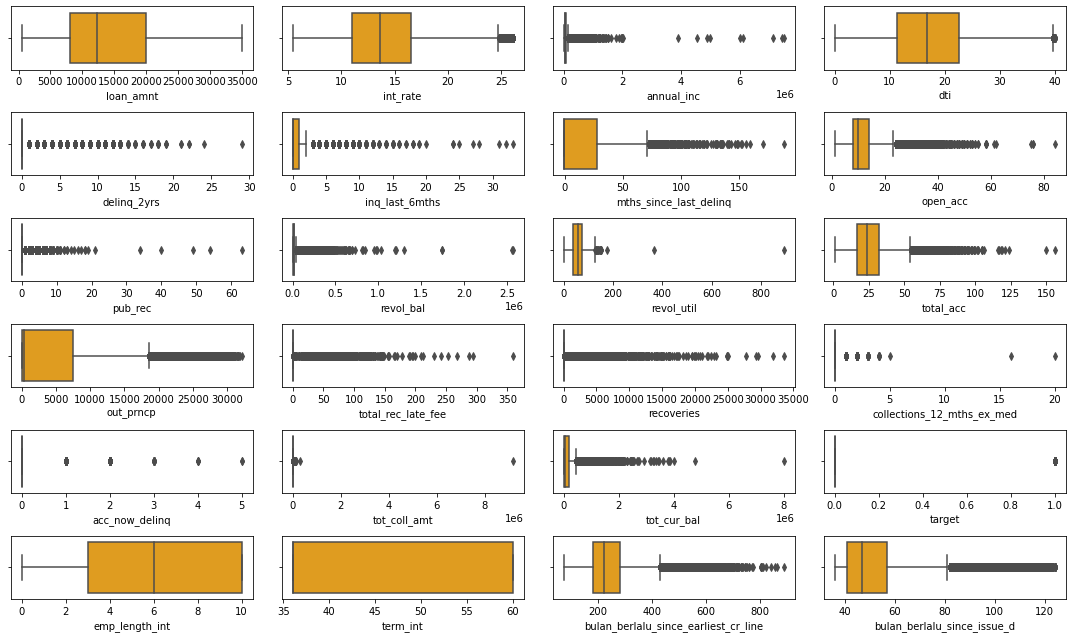

In [89]:
numericals = dfeda_num

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(7, 4, i+1) # 7,2 maksudnya 7x2=14 kolom, sesuaikan dengan jumlah kolom numerik
    sns.boxplot(x=dfeda[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

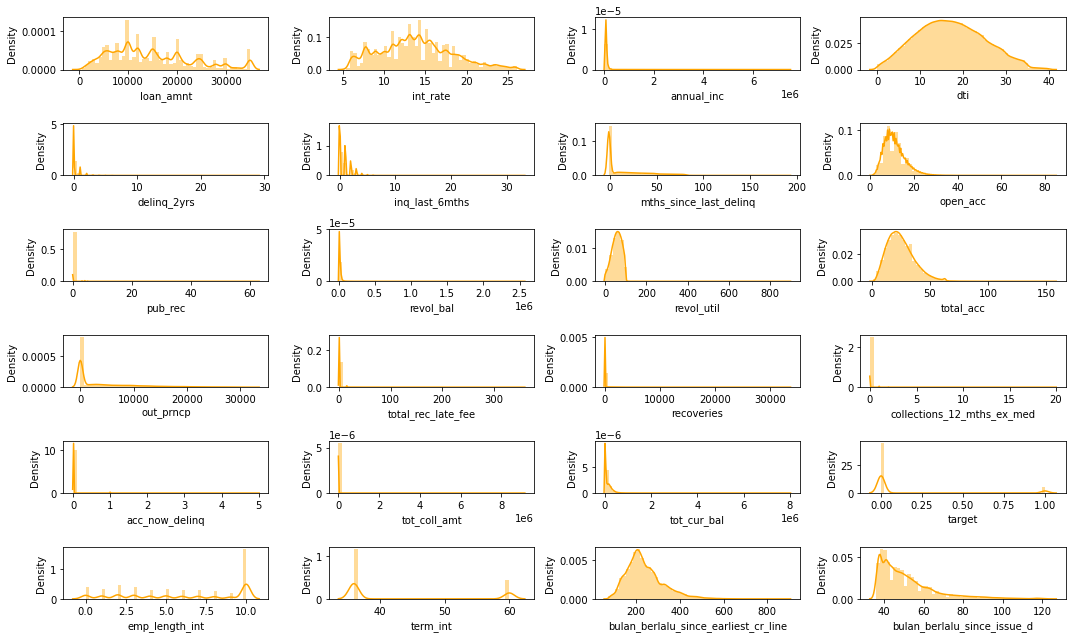

In [156]:
numericals = dfeda_num

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(7, 4, i+1) # 7,2 maksudnya 7x2=14 kolom, sesuaikan dengan jumlah kolom numerik
    sns.distplot(dfeda[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

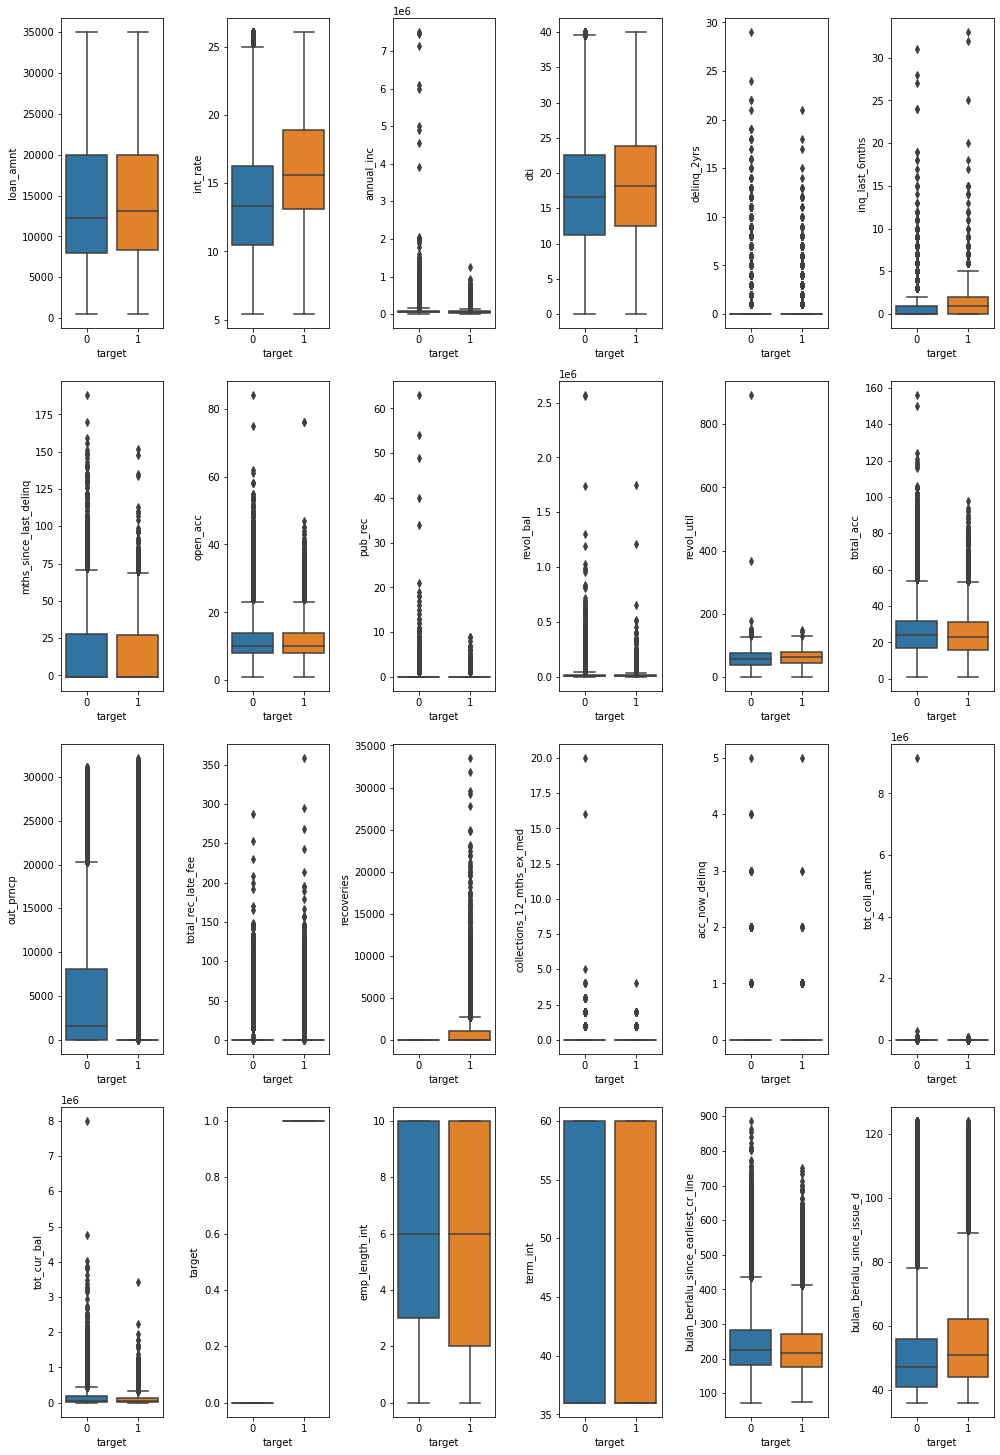

In [99]:
numericals = dfeda_num

plt.figure(figsize=(14, 35))
for i in range(0, len(numericals)):
    plt.subplot(7, 6, i+1) # 7,6 demensi
    sns.boxplot(x="target", y=boxplot_catplot[i],data=dfeda)
    plt.tight_layout()

plt.show()

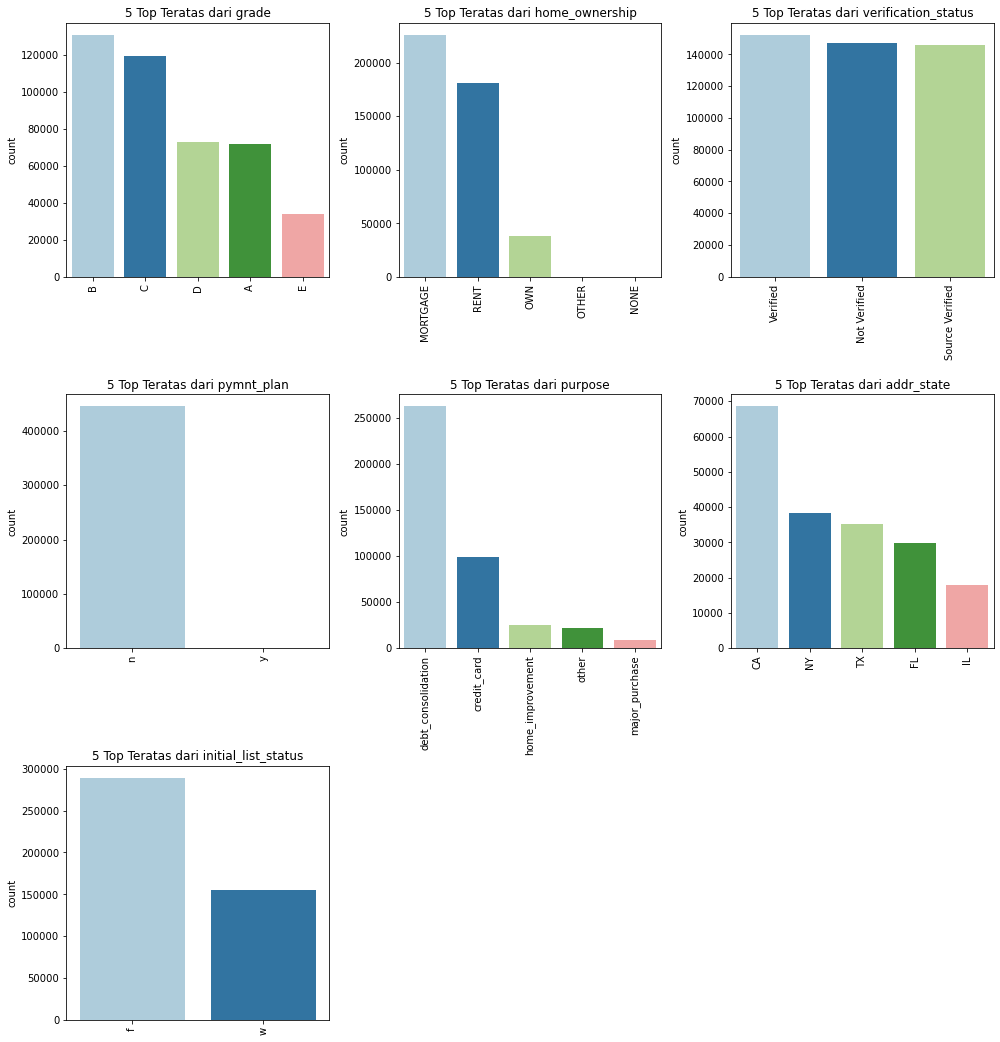

In [154]:
numericals = dfeda_cat

plt.figure(figsize=(14, 35))
for i in range(0, len(numericals)):
    plt.subplot(7, 3, i+1) # 7,6 demensi
    sns.countplot(x=dfeda_cat[i],  data=dfeda , palette='Paired',order=pd.value_counts(dfeda[dfeda_cat[i]]).iloc[:5].index)
    plt.xlabel("")
    plt.tick_params(axis='x', rotation=90)
    plt.title('5 Top Teratas dari ' + dfeda_cat[i])
    plt.tight_layout()

plt.show()

saya malas untuk membuat interpretasi dari bagan-bagan di atas, saya serahkan interpretasinya kepada kemampuan anda, hehe  maap

# FEATURE SCALING AND TRANSFORMATION

## categorical values check

In [45]:
colcat = pd.DataFrame(df.select_dtypes(include='object').nunique()).reset_index()
colcat['nama kolom'] = colcat['index']
colcat['unique'] = colcat[0]
colcat.drop(['index',0], axis=1, inplace=True)
colcat

,nama kolom,unique
0,grade,7
1,home_ownership,6
2,verification_status,3
3,pymnt_plan,2
4,purpose,14
5,addr_state,50
6,initial_list_status,2


## one hot encoding

In [46]:
colcat = colcat['nama kolom'].tolist()
onehot = pd.get_dummies(df[colcat], drop_first=True)
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler (fitur target dikecualikan)

In [47]:
numerical_cols = [col for col in df.columns.tolist() if col not in colcat + ['target']]

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [49]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,bulan_berlalu_since_earliest_cr_line,bulan_berlalu_since_issue_d
0,-1.139306,-0.727554,-0.906941,1.340611,-0.358208,0.177166,-0.708202,-1.650415,-0.306197,-0.130581,1.155456,-1.390240,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.797064,1.104451,-0.623213,1.847927,1.434191
1,-1.440625,0.331980,-0.798959,-2.067175,-0.358208,3.839205,-0.708202,-1.650415,-0.306197,-0.704183,-1.976293,-1.821307,-0.693406,-0.123916,0.055298,-0.083169,-0.058321,-0.011605,-0.797064,-1.653010,1.604588,-0.187308,1.434191
2,-1.452678,0.490222,-1.118370,-1.080004,-0.358208,1.092676,-0.708202,-1.850527,-0.306197,-0.643327,1.779276,-1.304027,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.797064,1.104451,-0.623213,-0.556269,1.434191
3,-0.536669,-0.076239,-0.453416,0.362391,-0.358208,0.177166,0.864173,-0.249629,-0.306197,-0.516627,-1.487352,1.023735,-0.693406,3.081669,-0.155074,-0.083169,-0.058321,-0.011605,-0.797064,1.104451,-0.623213,0.264966,1.434191
4,-1.380361,-0.259708,0.100892,0.098975,-0.358208,-0.738344,0.995204,0.750932,-0.306197,0.547278,-0.100616,1.109948,-0.573493,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.797064,-1.377264,1.604588,0.276868,1.434191


## Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi, sebelum menggabungkan alangkah lebih baik melakukan reset index, untuk menghindari pandas menghasilkan value NaN gara-gara index yang tidak sama

In [50]:
onehot.reset_index(drop=True, inplace=True)
std.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
data_model = pd.concat([onehot, std, df[['target']]], axis=1)
data_model.shape,onehot.shape,std.shape,df.shape

((444836, 101), (444836, 77), (444836, 23), (444836, 31))

# Import evaluation Library

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

# Hyperparameter Tuning XgBoost with Hyperopt
Link : https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook </br>
The available hyperopt optimization algorithms are -

hp.choice(label, options) — Returns one of the options, which should be a list or tuple.

hp.randint(label, upper) — Returns a random integer between the range [0, upper).

hp.uniform(label, low, high) — Returns a value uniformly between low and high.

hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

hp.normal(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

In [53]:
# !pip install hyperopt

In [53]:
X = data_model.drop('target', axis=1)
y = data_model['target']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## Using Hyperopt

In [56]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [57]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [58]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [59]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.9422484657289941                                                                                                     
SCORE:                                                                                                                 
0.9424807607286569                                                                                                     
SCORE:                                                                                                                 
0.9422934260515096                                                                                                     
SCORE:                                                                                                                 
0.9427505226637493                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9424283070190557                                                                                                     
SCORE:                                                                                                                 
0.9425407078253442                                                                                                     
SCORE:                                                                                                                 
0.94254820121243                                                                                                       
SCORE:                                                                                                                 
0.9424582805673992                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9427505226637493                                                                                                     
SCORE:                                                                                                                 
0.9424657739544852                                                                                                     
SCORE:                                                                                                                 
0.9424657739544852                                                                                                     
SCORE:                                                                                                                 
0.9424657739544852                                                                                                     
SCORE:                                  

In [60]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7537496765569185, 'gamma': 7.246528749254674, 'max_depth': 6.0, 'min_child_weight': 0.0, 'reg_alpha': 135.0, 'reg_lambda': 0.7365697088283668}


In [61]:
# convert to string
def hapus_karakter_unik(a):
    a = a.replace("'","") 
    a = a.replace('"',"'")
    a = a.replace('{',"")
    a = a.replace('}',"")
    a = a.replace(':',"=")
    a = a.replace('.0,',",")
    return a

best_hyperparameters = str(best_hyperparams)
best_hyperparameters = hapus_karakter_unik(best_hyperparameters)
print(best_hyperparameters)
# def paramTuning():
#     return print(best_hyperparameters)
# paramTuning()

colsample_bytree= 0.7537496765569185, gamma= 7.246528749254674, max_depth= 6, min_child_weight= 0, reg_alpha= 135, reg_lambda= 0.7365697088283668


In [62]:
from hyperopt import space_eval
bparamsdict = space_eval(space, best_hyperparams)
xgb_best_params_tuning = pd.DataFrame(list(bparamsdict.items()), columns = ['parameter','Value'])
bestparams0 = float(xgb_best_params_tuning['Value'][0])
bestparams1 = float(xgb_best_params_tuning['Value'][1]) 
bestparams2 = int(xgb_best_params_tuning['Value'][2]) 
bestparams3 = int(xgb_best_params_tuning['Value'][3])
bestparams4 = int(xgb_best_params_tuning['Value'][4])
bestparams5 = int(xgb_best_params_tuning['Value'][5]) 
bestparams6 = float(xgb_best_params_tuning['Value'][6])
bestparams7 = int(xgb_best_params_tuning['Value'][7])
xgb_best_params_tuning


,parameter,Value
0,colsample_bytree,0.753750
1,gamma,7.246529
2,max_depth,6.000000
3,min_child_weight,0.000000
4,n_estimators,180.000000
5,reg_alpha,135.000000
6,reg_lambda,0.736570
7,seed,0.000000


## Evaluasi dengan parameter terbaik yang ditemukan pada proses hyperparameter tuning seblumnya.

In [158]:
X = data_model.drop('target', axis=1)
y = data_model['target']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

Accuracy Train - Tuning		: 0.95
Accuracy Test - Tuning		: 0.94
Precision Train - Tuning	: 0.99
Precision Test - Tuning		: 0.99
Recall Train - Tuning		: 0.50
Recall Test - Tuning		: 0.50
specificity Train - Tuning	: 1.00
specificity Test - Tuning	: 1.00
F1 Score Train - Tuning		: 0.66
F1 Score Test - Tuning		: 0.66
Roc-AUC Train - Tuning 		: 0.75
Roc-AUC Test - Tuning 		: 0.75

 Report Klasifikasi Train :
-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    277785
           1       0.99      0.50      0.66     33600

    accuracy                           0.95    311385
   macro avg       0.96      0.75      0.82    311385
weighted avg       0.95      0.95      0.94    311385


 Report Klasifikasi Test :
-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    118946
      

<AxesSubplot:>

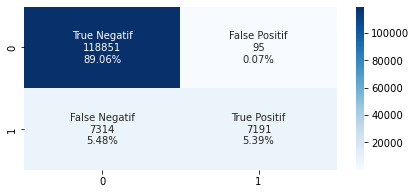

In [60]:
# Fit - train
import xgboost as xgb

# Penyetingan menggunakan parameter terbaik.
xgb = xgb.XGBClassifier(colsample_bytree = bestparams0, 
                        gamma = bestparams1, 
                        max_depth = bestparams2, 
                        min_child_weight = bestparams3,
#                         n_estimators = bestparams4,
                        reg_alpha = bestparams5, 
#                         seed = bestparams7,
                       reg_lambda = bestparams6)

# Penyetingan parameter secara manual
# xgb = xgb.XGBClassifier(colsample_bytree= 0.7508546033482361, 
#                         gamma= 1.8810689409604566, 
#                         max_depth= 14, 
#                         min_child_weight= 9, 
#                         reg_alpha= 109, 
#                         reg_lambda= 0.4775669801060372)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb_tuning_train = xgb.predict(X_train) # prediksi train dataset
y_pred_xgb_tuning_test = xgb.predict(X_test) # prediksi test dataset


#EValuasi
accuracy_xgb_tuning_train = accuracy_score(y_train, y_pred_xgb_tuning_train)
accuracy_xgb_tuning_test = accuracy_score(y_test, y_pred_xgb_tuning_test)

precision_xgb_tuning_train = precision_score(y_train, y_pred_xgb_tuning_train)
precision_xgb_tuning_test = precision_score(y_test, y_pred_xgb_tuning_test)

recall_xgb_tuning_train = recall_score(y_train, y_pred_xgb_tuning_train)
recall_xgb_tuning_test = recall_score(y_test, y_pred_xgb_tuning_test)

specificity_xgb_tuning_train = recall_score(y_train, y_pred_xgb_tuning_train, pos_label=0)
specificity_xgb_tuning_test = recall_score(y_test, y_pred_xgb_tuning_test, pos_label=0)

F1_xgb_tuning_train = f1_score(y_train, y_pred_xgb_tuning_train)
F1_xgb_tuning_test = f1_score(y_test, y_pred_xgb_tuning_test)

roc_auc_xgb_tuning_train = roc_auc_score(y_train, y_pred_xgb_tuning_train)
roc_auc_xgb_tuning_test = roc_auc_score(y_test, y_pred_xgb_tuning_test)

print('Accuracy Train - Tuning\t\t: %.2f' % accuracy_xgb_tuning_train)
print('Accuracy Test - Tuning\t\t: %.2f' % accuracy_xgb_tuning_test)

print('Precision Train - Tuning\t: %.2f' % precision_xgb_tuning_train)
print('Precision Test - Tuning\t\t: %.2f' % precision_xgb_tuning_test)

print('Recall Train - Tuning\t\t: %.2f' % recall_xgb_tuning_train)
print('Recall Test - Tuning\t\t: %.2f' % recall_xgb_tuning_test)

print('specificity Train - Tuning\t: %.2f' % specificity_xgb_tuning_train)
print('specificity Test - Tuning\t: %.2f' % specificity_xgb_tuning_test)

print('F1 Score Train - Tuning\t\t: %.2f' % F1_xgb_tuning_train)
print('F1 Score Test - Tuning\t\t: %.2f' % F1_xgb_tuning_test)

print('Roc-AUC Train - Tuning \t\t: %.2f' % roc_auc_xgb_tuning_train)
print('Roc-AUC Test - Tuning \t\t: %.2f' % roc_auc_xgb_tuning_test)

from sklearn.metrics import classification_report, confusion_matrix
print('\n Report Klasifikasi Train :')
print('-----------------------------------------------------------\n')
print(classification_report(y_train,y_pred_xgb_tuning_train))

print('\n Report Klasifikasi Test :')
print('-----------------------------------------------------------\n')
print(classification_report(y_test,y_pred_xgb_tuning_test))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred_xgb_tuning_test)


# Visualization Confusion Matrix on test dataset
print('\n Confusion Matrix Test :')
print('-----------------------------------------------------------\n')
group_names = ['True Negatif','False Positif','False Negatif','True Positif']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7,3))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Hyperparameter Tuning  Random Forest with GridseacrhCV

In [65]:
X = data_model.drop('target', axis=1)
y = data_model['target']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [66]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

## Using GridsearchCV

In [67]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    # 'max_depth':(1,2,3,4,5)
    'max_depth':list(range(10, 15))

}

# note: we use metrik yg telah ditentukan sesuai tujuan (recall/akurasi/presisi/Dll)
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy') 
rf_clf_gridcv.fit(X_train, y_train)

# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

Wall time: 35min 59s


,params,mean_test_score,rank_test_score
21,"{'max_depth': 14, 'n_estimators': 20}",0.944683,1
22,"{'max_depth': 14, 'n_estimators': 30}",0.944612,2
23,"{'max_depth': 14, 'n_estimators': 40}",0.944583,3
24,"{'max_depth': 14, 'n_estimators': 50}",0.944573,4
19,"{'max_depth': 13, 'n_estimators': 50}",0.944561,5
12,"{'max_depth': 12, 'n_estimators': 30}",0.944554,6
17,"{'max_depth': 13, 'n_estimators': 30}",0.944545,7
18,"{'max_depth': 13, 'n_estimators': 40}",0.944522,8
14,"{'max_depth': 12, 'n_estimators': 50}",0.944506,9
13,"{'max_depth': 12, 'n_estimators': 40}",0.944496,10


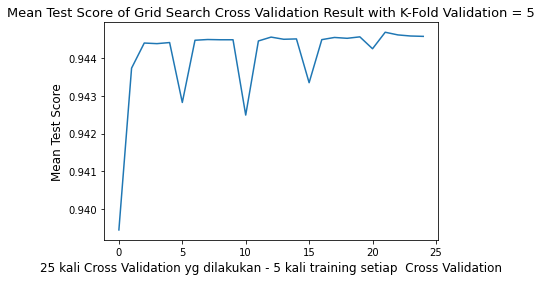

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# creating a DataFrame with 2 columns
a = cv_result['mean_test_score'].tolist()
dataFrame = pd.DataFrame(
   {
      'mean_test_score': a
   }
)

# plot a line graph
plt.plot(dataFrame["mean_test_score"])
# plt.ylim(160, 180)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.titlesize'] = (13)
# displaying the title
plt.title("Mean Test Score of Grid Search Cross Validation Result with K-Fold Validation = 5")
plt.ylabel("Mean Test Score", fontsize=12)
plt.xlabel("25 kali Cross Validation yg dilakukan - 5 kali training setiap  Cross Validation", fontsize=12)
# plt.ylim(0, 1)
plt.show()

## Evaluasi dengan parameter terbaik yang ditemukan pada proses hyperparameter tuning seblumnya.

In [61]:
X = data_model.drop('target', axis=1)
y = data_model['target']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [70]:
rf_clf_gridcv.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=20, random_state=42)

Accuracy Train		: 0.95
Accuracy Test		: 0.94
Precision Train		: 1.00
Precision Test		: 0.99
Recall Train		: 0.50
Recall Test		: 0.49
specificity Train	: 1.00
specificity Test	: 1.00
F1 Score Train		: 0.67
F1 Score Test		: 0.65
Roc-AUC Train 		: 0.75
Roc-AUC Test 		: 0.74

 Report Klasifikasi Train :
-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    277785
           1       1.00      0.50      0.67     33600

    accuracy                           0.95    311385
   macro avg       0.97      0.75      0.82    311385
weighted avg       0.95      0.95      0.94    311385


 Report Klasifikasi Test :
-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    118946
           1       0.99      0.49      0.65     14505

    accuracy                           0.94    133451
   m

<AxesSubplot:>

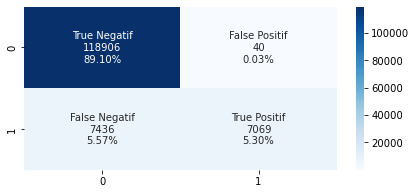

In [62]:
# Fit - train
from sklearn.ensemble import RandomForestClassifier
# rf = rf_clf_randomcv.best_estimator_ # best parameter yang dihasilkan randomizedsearchcv
rf = rf_clf_gridcv.best_estimator_ # best parameter yang dihasilkan gridsearchcv
# rf = RandomForestClassifier(random_state=42,n_estimators=30, max_depth=5) # jika ingin menggunakan parameter yang diset secara manual

# Train
rf.fit(X_train,y_train)

# Predict
y_pred_rf_tuning_train = rf.predict(X_train) # prediksi train dataset
y_pred_rf_tuning_test = rf.predict(X_test) # prediksi test dataset

#EValuasi
accuracy_tuning_rf_tuning_train = accuracy_score(y_train, y_pred_rf_tuning_train)
accuracy_tuning_rf_tuning_test = accuracy_score(y_test, y_pred_rf_tuning_test)

precision_tuning_rf_tuning_train = precision_score(y_train, y_pred_rf_tuning_train)
precision_tuning_rf_tuning_test = precision_score(y_test, y_pred_rf_tuning_test)

recall_tuning_rf_tuning_train = recall_score(y_train, y_pred_rf_tuning_train)
recall_tuning_rf_tuning_test = recall_score(y_test, y_pred_rf_tuning_test)

specificity_tuning_rf_tuning_train = recall_score(y_train, y_pred_rf_tuning_train, pos_label=0)
specificity_tuning_rf_tuning_test = recall_score(y_test, y_pred_rf_tuning_test, pos_label=0)

F1_tuning_rf_tuning_train = f1_score(y_train, y_pred_rf_tuning_train)
F1_tuning_rf_tuning_test = f1_score(y_test, y_pred_rf_tuning_test)

roc_auc_rf_tuning_train = roc_auc_score(y_train, y_pred_rf_tuning_train)
roc_auc_rf_tuning_test = roc_auc_score(y_test, y_pred_rf_tuning_test)

print('Accuracy Train\t\t: %.2f' % accuracy_tuning_rf_tuning_train)
print('Accuracy Test\t\t: %.2f' % accuracy_tuning_rf_tuning_test)

print('Precision Train\t\t: %.2f' % precision_tuning_rf_tuning_train)
print('Precision Test\t\t: %.2f' % precision_tuning_rf_tuning_test)

print('Recall Train\t\t: %.2f' % recall_tuning_rf_tuning_train)
print('Recall Test\t\t: %.2f' % recall_tuning_rf_tuning_test)

print('specificity Train\t: %.2f' % specificity_tuning_rf_tuning_train)
print('specificity Test\t: %.2f' % specificity_tuning_rf_tuning_test)

print('F1 Score Train\t\t: %.2f' % F1_tuning_rf_tuning_train)
print('F1 Score Test\t\t: %.2f' % F1_tuning_rf_tuning_test)

print('Roc-AUC Train \t\t: %.2f' % roc_auc_rf_tuning_train)
print('Roc-AUC Test \t\t: %.2f' % roc_auc_rf_tuning_test)

from sklearn.metrics import classification_report, confusion_matrix
print('\n Report Klasifikasi Train :')
print('-----------------------------------------------------------\n')
print(classification_report(y_train,y_pred_rf_tuning_train))

print('\n Report Klasifikasi Test :')
print('-----------------------------------------------------------\n')
print(classification_report(y_test,y_pred_rf_tuning_test))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred_rf_tuning_test)


# Visualization Confusion Matrix on test dataset
print('\n Confusion Matrix Test :')
print('-----------------------------------------------------------\n')
group_names = ['True Negatif','False Positif','False Negatif','True Positif']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7,3))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# KS - RFC

In [63]:
y_pred_proba = rf.predict_proba(X_test)[:][:,1]

In [64]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [65]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [66]:
df_actual_predicted.head(3)

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,124569,0,0.007009,1,0,1,0.000007,0.0,0.000008
1,284322,0,0.007734,2,0,2,0.000015,0.0,0.000017
2,150358,0,0.007753,3,0,3,0.000022,0.0,0.000025


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5931')

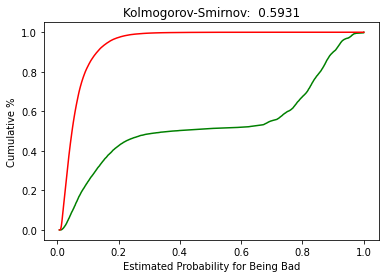

In [67]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='g')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='r')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [68]:
ks_rfc_test = KS

In [69]:
y_pred_proba = rf.predict_proba(X_train)[:][:,1]

In [70]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_train.index

In [71]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [72]:
df_actual_predicted.head(3)

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,258760,0,0.006243,1,0,1,0.000003,0.0,0.000004
1,135193,0,0.006918,2,0,2,0.000006,0.0,0.000007
2,130911,0,0.006979,3,0,3,0.000010,0.0,0.000011


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6969')

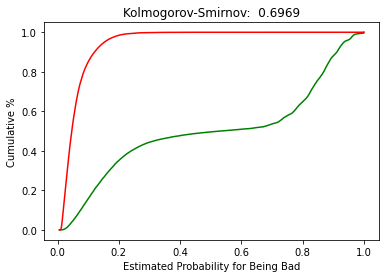

In [73]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='g')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='r')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [74]:
ks_rfc_train = KS

# KS - XGB

In [75]:
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

In [76]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [77]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [78]:
df_actual_predicted.head(3)

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,314790,0,0.004888,1,0,1,0.000007,0.0,0.000008
1,428845,0,0.004993,2,0,2,0.000015,0.0,0.000017
2,327658,0,0.005108,3,0,3,0.000022,0.0,0.000025


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6093')

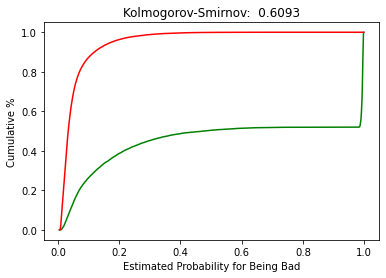

In [79]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='g')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='r')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [80]:
ks_xgb_test = KS

In [81]:
y_pred_proba = xgb.predict_proba(X_train)[:][:,1]

In [82]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_train.index

In [83]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [84]:
df_actual_predicted.head(3)

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,394243,0,0.004957,1,0,1,0.000003,0.0,0.000004
1,241923,0,0.005220,2,0,2,0.000006,0.0,0.000007
2,128206,0,0.005304,3,0,3,0.000010,0.0,0.000011


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6213')

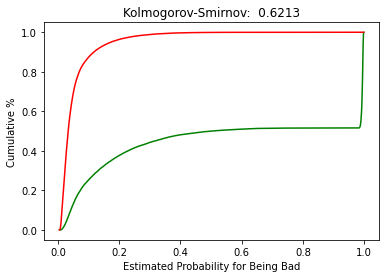

In [85]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='g')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='r')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [86]:
ks_xgb_train = KS

# Evaluasi hasil dari Hyperparame tuning

In [87]:
result = pd.DataFrame({'Algorithm used':['XgBoost - Tuning','Random Forest - Tuning'],
                        'Accuracy Train':[accuracy_xgb_tuning_train,accuracy_tuning_rf_tuning_train],
                       'Accuracy Test':[accuracy_xgb_tuning_test,accuracy_tuning_rf_tuning_test],
#                         'Recall Train':[recall_xgb_tuning_train,recall_tuning_rf_tuning_train],
#                        'Recall Test':[recall_xgb_tuning_test,recall_tuning_rf_tuning_test],
                        'Presisi Train':[precision_xgb_tuning_train,precision_tuning_rf_tuning_train],
                        'Presisi Test':[precision_xgb_tuning_test,precision_tuning_rf_tuning_test],
                        'specificity Train':[specificity_xgb_tuning_train,specificity_tuning_rf_tuning_train],
                        'specificity Test':[specificity_xgb_tuning_test,specificity_tuning_rf_tuning_test],
#                         'F1 Score Train':[F1_xgb_tuning_train,F1_tuning_rf_tuning_train],
#                         'F1 Score Test':[F1_xgb_tuning_test,F1_tuning_rf_tuning_test],
                       'ROC-AUC Train':[roc_auc_xgb_tuning_train,roc_auc_rf_tuning_train],
                       'Roc-AUC Test':[roc_auc_xgb_tuning_test,roc_auc_rf_tuning_test],
                       'KS-Train':[ks_xgb_train,ks_rfc_train],
                       'KS-Test':[ks_xgb_test,ks_rfc_test]
                        })
# result
sorted_df = result.sort_values(by=['Accuracy Test'], ascending=False).reset_index().drop('index', 1)
sorted_df.round(2)

C:\Users\irvan\AppData\Local\Temp/ipykernel_9248/3542469639.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sorted_df = result.sort_values(by=['Accuracy Test'], ascending=False).reset_index().drop('index', 1)


,Algorithm used,Accuracy Train,Accuracy Test,Presisi Train,Presisi Test,specificity Train,specificity Test,ROC-AUC Train,Roc-AUC Test,KS-Train,KS-Test
0,XgBoost - Tuning,0.95,0.94,0.99,0.99,1.0,1.0,0.75,0.75,0.62,0.61
1,Random Forest - Tuning,0.95,0.94,1.00,0.99,1.0,1.0,0.75,0.74,0.70,0.59


# Feature Importance

## Feature Importance

In [69]:
# Random Forest

arr_feature_importances = rf.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(5)

,feature,importance
91,recoveries,0.677123
89,out_prncp,0.078899
90,total_rec_late_fee,0.037980
78,int_rate,0.028727
99,bulan_berlalu_since_issue_d,0.015195


In [72]:
# XgBoost

arr_feature_importances = xgb.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(5)

,feature,importance
91,recoveries,0.821688
78,int_rate,0.030582
89,out_prncp,0.030300
90,total_rec_late_fee,0.027833
99,bulan_berlalu_since_issue_d,0.010712


## Feature Importance with Shap

In [73]:
import shap

In [74]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


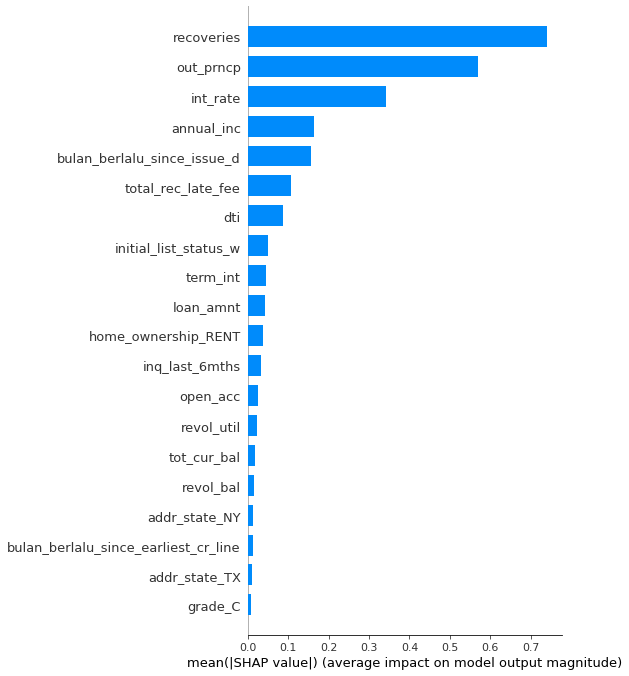

In [75]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

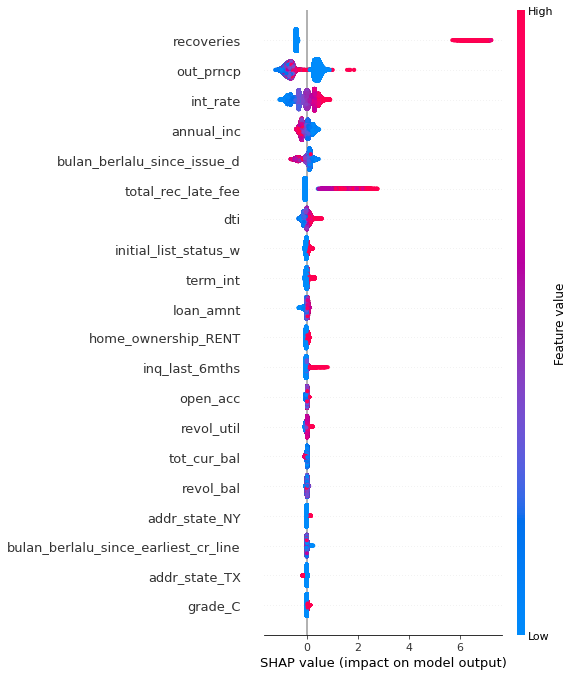

In [76]:
shap.summary_plot(shap_values, X_test)

link : https://mljar.com/blog/feature-importance-xgboost/#:~:text=Xgboost%20is%20a%20gradient%20boosting,%2C%20R%2C%20Julia%2C%20Scala.

# Conclusion

Beberapa Kesimpulan yg didapatkan pada projek ini :
- Model terbaik setelah melakukan Hyperparameter Tuning ialah XgBoost, karena value dari smua matrix paling stabil.
- Fitur importance pada projek ini yakni Recoveries, out_prncp, int_rate, anual_income dan seterusnya.
- karena data imbalance maka menggunakan metric AUC dan KS, kedua Matrix ini  menunjukkan nilai yg baik(AUC = 74-75, KS = 61-62), karena pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik, silahkan lihat bagian "evaluasi hasil dari Hyperparameter tuning" untuk informasi lebih lanjut.
- 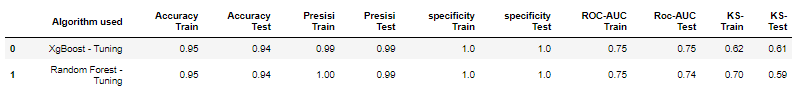
- Tidak melakukan SMOTE (Metode untuk membuat target Balance).
- Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.
- Menggunakan Library Hyperopt untuk tuning algoritma Xgboost dan GridSearchCV untuk tuning algoritma RandomForest, namun sebaiknya menggunakan RandomsearchCV daripada GridSearchCV agar waktu hyperparametertuning dapat lebih singkat.
- Model tidak memiliki Overfitting/underfitting, dapat dilihat pada bagian "evaluasi hasil dari Hyperparameter tuning" untuk informasi lebih lanjut.
- 74 Fitur pada Raw Dataset yang kemudian di proses dgn mendrop beberapa fitur dan diteruskan dengan encoding sehingga fitur menjadi 101 firtur
- kesimpulan terakhir jika kita menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan melakukan Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.
- kesimpulan dari EDA silahkan interpretasi sendiri.